In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

# Usar seaborn para las gráficas
import seaborn as sns; sns.set()

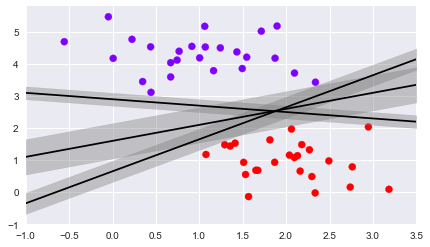

In [2]:
# Crear ejemplor para clasificar
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.figure(figsize=(7,4))
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='grey', alpha=0.4)

plt.xlim(-1, 3.5);

Las máquinas de soporte vectorial buscan maximizar el margen (mínima distancia entre dos puntos), por lo que aquella "línea" con máximo margen será la seleccionada para la clasificación de las observaciones 

In [3]:
model=SVC(kernel="linear",C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, facecolors='none',
                   edgecolor="k");
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

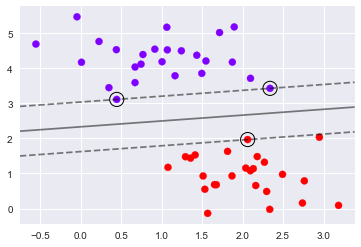

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(model);

Esta es la línea que maximiza el margen entre los dos conjuntos de datos. Aquellos puntos que están resaltado son los elementos pivote o los vectores de soporte, y resultan ser los de importancia para la clasificación de nuevas observaciones

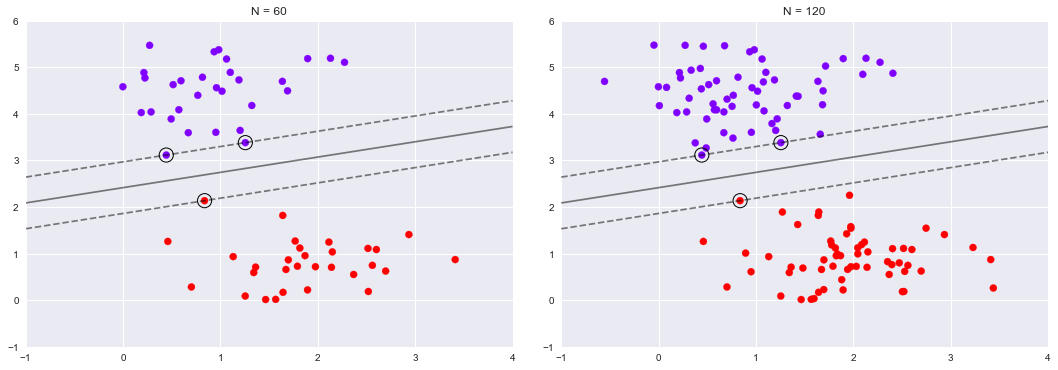

In [6]:
# Crear una función para entrenar y gráficar modelos con diferentes dimensiones 

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

# Prueba con dos tamaños diferentes para evidenciar los vectores de soporte

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

El modelo al ser entrenado con 60 y 120 observaciones no presenta cambios en los vectores de soporte, esta insensibilidad a la distancia entre punto es una de las fortalezas del SVM

In [7]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,50,120,200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 120, 200), value=10), Output()), _dom_classes…

## Uso de otros kernels

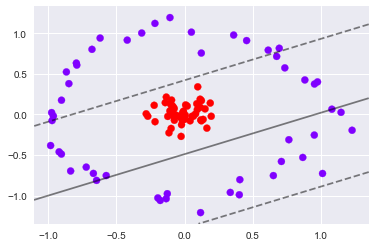

In [8]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf, plot_support=False);

Dado que los datos no son linealmente separables no es posible utilizar un kernel lineal como el ejemplo anterior. una opción resulta la de pryectar los datos en una dimensión superior tal que se pueda hacer una separación lineal, por ejemplo, el uso de una función de base radial centrada en el grupo

In [9]:
r = np.exp(-(X ** 2).sum(1))

In [10]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,45 ,90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 45, 90), value=-90), IntSlider(value=30, desc…

In [11]:
clf= SVC(kernel="rbf", C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

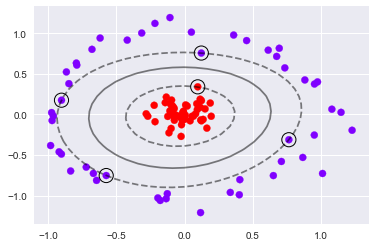

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Solapamiento

En la mayoria de casos las observaciones no están tan perfectamente separadas, por lo que hace falta incluir un factor de penalización para permitir que hayan punto dentro de los márgenes, dicho factor es conocido como "C" y corresponde a un hiperparámetro de las SVM.

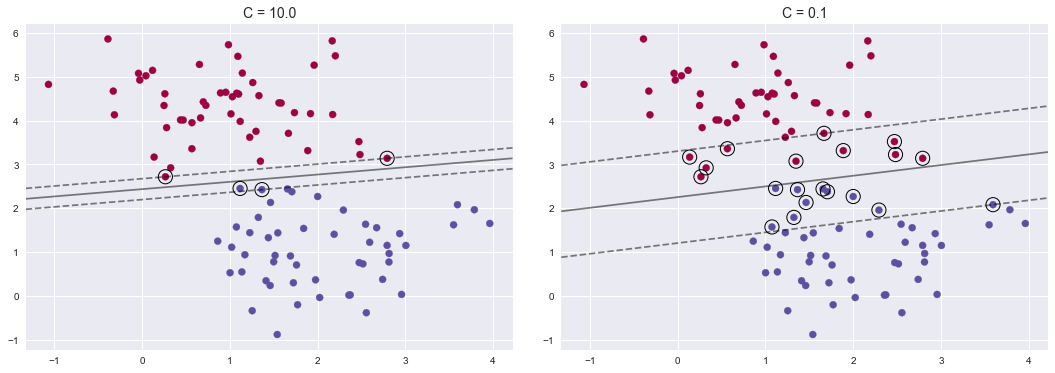

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Spectral')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

El valor de C debe ser determinado mediante validación cruzada

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

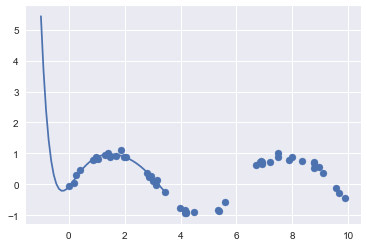

In [29]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [26]:
x[:, np.newaxis][:5]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

In [30]:
yfit[:5]

array([5.43769969, 3.70136028, 2.39780119, 1.44276829, 0.76537887])